In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.metrics import confusion_matrix

from tensorflow.keras import datasets

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 

In [2]:
word_embeddings = pd.read_csv('WordEmbeddings_TF_64.csv')
word_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Word
0,-0.043112,-0.044180,-0.000702,0.010770,0.002801,0.002144,-0.016408,0.041084,-0.019775,-0.014173,...,-0.040594,-0.017918,-0.039003,0.019360,0.000069,0.049965,0.008555,0.031493,-0.029020,[PAD]
1,0.077637,-0.139258,-0.120176,-0.225333,0.018501,-0.134275,-0.049474,0.202666,0.035748,-0.303752,...,0.259259,0.477063,0.053305,0.264979,0.089871,0.121198,0.185777,0.147721,-0.103953,[UNK]
2,0.219406,0.014036,-0.004812,0.071541,0.091325,0.143101,-0.196247,0.216164,-0.321792,0.038685,...,-0.066000,-0.027182,-0.275846,-0.167044,0.505876,-0.283258,-0.102449,0.117133,0.195757,the
3,-0.036935,0.107469,-0.263067,-0.097306,-0.095095,0.162527,-0.217829,-0.035648,-0.067412,0.050026,...,0.248766,-0.056456,0.161341,-0.124493,0.031764,0.254419,0.146425,-0.022498,0.297895,and
4,0.382986,0.268528,-0.235734,-0.511373,0.064016,-0.493871,0.395889,-0.121680,0.298298,0.083211,...,0.443925,0.103798,-0.332466,-0.046445,-0.231823,0.409594,0.596419,0.446775,-0.263178,of


In [3]:
df = pd.read_csv('Poems_Author_Age.csv')
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [4]:
df.shape

(4838, 5)

<Axes: xlabel='age', ylabel='count'>

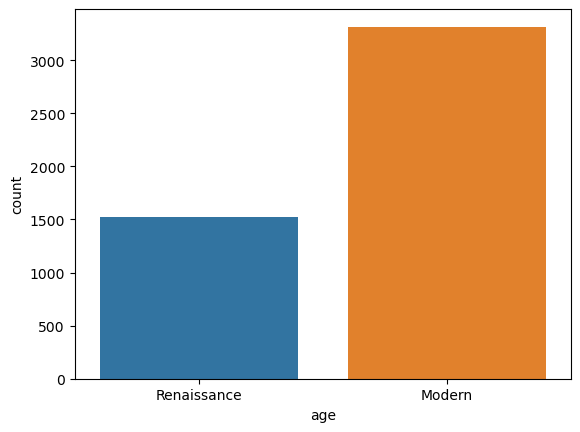

In [4]:
sns.countplot(df, x = 'age')

In [5]:
df['age'].value_counts(normalize = True)

Modern         0.685407
Renaissance    0.314593
Name: age, dtype: float64

In [6]:
texts = list(df['content'])

In [7]:
unique_words = list(word_embeddings['Word'])
len(unique_words)

15000

In [8]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def preprocess(text):
    text = text.lower().replace('NEWLINE',' ')
    text = text.replace('\r',' ')
    text = text.replace('\n',' ')
    text = re.sub('[\W\d_]+', ' ', text)
    text = re.sub(' +', ' ', text)
    words = text.split(' ')
    words = [ps.stem(word) if ps.stem(word) in unique_words else '[UNK]' for word in words]
    text = ' '.join(words)
    return text
    

In [9]:
print(texts[0])

Let the bird of loudest lay
On the sole Arabian tree
Herald sad and trumpet be,
To whose sound chaste wings obey.

But thou shrieking harbinger,
Foul precurrer of the fiend,
Augur of the fever's end,
To this troop come thou not near.

From this session interdict
Every fowl of tyrant wing,
Save the eagle, feather'd king;
Keep the obsequy so strict.

Let the priest in surplice white,
That defunctive music can,
Be the death-divining swan,
Lest the requiem lack his right.

And thou treble-dated crow,
That thy sable gender mak'st
With the breath thou giv'st and tak'st,
'Mongst our mourners shalt thou go.

Here the anthem doth commence:
Love and constancy is dead;
Phoenix and the Turtle fled
In a mutual flame from hence.

So they lov'd, as love in twain
Had the essence but in one;
Two distincts, division none:
Number there in love was slain.

Hearts remote, yet not asunder;
Distance and no space was seen
'Twixt this Turtle and his queen:
But in them it were a wonder.

So between them love di

In [10]:
preprocess(texts[0])

'let the bird of loudest lay on the sole arabian tree herald sad and trumpet be to whose sound chast wing obey but thou shriek harbing foul [UNK] of the fiend augur of the fever s end to thi troop come thou not near from thi session [UNK] everi fowl of tyrant wing save the eagl feather d king keep the [UNK] so strict let the priest in [UNK] white that defunct music can be the death divin swan lest the requiem lack hi right and thou trebl date crow that thi sabl gender mak st with the breath thou giv st and tak st mongst our mourner shalt thou go here the anthem doth commenc love and constanc is dead phoenix and the turtl fled in a mutual flame from henc so they lov d as love in twain had the essenc but in one two distinct divis none number there in love wa slain heart remot yet not asund distanc and no space wa seen twixt thi turtl and hi queen but in them it were a wonder so between them love did shine that the turtl saw hi right flame in the phoenix sight either wa the other s mine p

In [11]:
word_dict = {}
i = 0
for word in unique_words:
    word_dict[word] = i
    i = i+1

In [12]:
word_dict

{'[PAD]': 0,
 '[UNK]': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'a': 5,
 'to': 6,
 'i': 7,
 'in': 8,
 'it': 9,
 'is': 10,
 'that': 11,
 'you': 12,
 'my': 13,
 'with': 14,
 'not': 15,
 'on': 16,
 'for': 17,
 'as': 18,
 'hi': 19,
 'he': 20,
 'we': 21,
 'wa': 22,
 'from': 23,
 'thi': 24,
 'but': 25,
 'me': 26,
 'all': 27,
 'like': 28,
 'at': 29,
 'be': 30,
 'her': 31,
 'are': 32,
 'they': 33,
 'or': 34,
 'have': 35,
 'your': 36,
 'one': 37,
 'what': 38,
 'by': 39,
 'will': 40,
 'when': 41,
 'their': 42,
 'she': 43,
 'so': 44,
 'no': 45,
 'there': 46,
 'our': 47,
 'who': 48,
 'out': 49,
 'do': 50,
 'would': 51,
 'if': 52,
 'an': 53,
 'into': 54,
 'love': 55,
 'up': 56,
 'where': 57,
 'then': 58,
 'now': 59,
 'were': 60,
 'am': 61,
 'them': 62,
 'us': 63,
 'how': 64,
 'day': 65,
 'know': 66,
 'him': 67,
 'say': 68,
 'had': 69,
 'time': 70,
 'which': 71,
 'down': 72,
 'can': 73,
 'through': 74,
 'come': 75,
 'eye': 76,
 'see': 77,
 'over': 78,
 'hand': 79,
 'more': 80,
 'light': 81,
 'could': 82,

In [13]:
processed_texts = [preprocess(text) for text in texts]

In [14]:
len(processed_texts)

4838

In [15]:
y = np.array(df['age'])
len(y)

4838

In [16]:
y

array(['Renaissance', 'Renaissance', 'Renaissance', ..., 'Modern',
       'Modern', 'Modern'], dtype=object)

In [17]:
y = np.array([0 if i == 'Renaissance' else 1 for i in y])

In [18]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
def indexed_text(text):
    return np.array([word_dict[word] for word in text.split(' ')])

In [20]:
X = [indexed_text(text) for text in processed_texts]

In [21]:
lengths = [len(i) for i in X]

In [22]:
sum(lengths)/len(lengths)

299.04195948739147

In [23]:
maxlen=200

X_padded = pad_sequences(X, maxlen = maxlen, padding = 'post', truncating = 'post', value = 0)

In [24]:
X_padded[0]

array([  114,     2,   234,     4,  8423,   408,    16,     2,  1966,
       11948,   125,  4294,   490,     3,  1873,    30,     6,   232,
         216,  4355,   311,  2630,    25,   169,  2234,  8592,  2072,
           1,     4,     2,  3264, 10979,     4,     2,  1806,  1143,
         184,     6,    24,  3174,    75,   169,    15,   414,    23,
          24,  7540,     1,   146,  4514,     4,  2998,   311,   527,
           2,  1787,   827,  1747,   458,   226,     2,     1,    44,
        5122,   114,     2,  1659,     8,     1,   118,    11, 11884,
         398,    73,    30,     2,   176,   987,  2028,  1968,     2,
        8254,  1266,    19,   224,     3,   169,  7212,  1666,  1106,
          11,    24,  5217,  4086,  8019,  1645,    14,     2,   205,
         169, 11832,  1645,     3,  6608,  1645, 11152,    47,  5498,
        1932,   169,    89,    91,     2,  5108,   745,  6009,    55,
           3, 10664,    10,   162,  5410,     3,     2,  2615,  1378,
           8,     5,

In [25]:
X_final = np.array(X_padded)
X_final.shape

(4838, 200)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(3628, 200)
(1210, 200)
3628
1210


In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [28]:
num_words = len(unique_words)+1
num_words

15001

### RNN_Dense

In [32]:
RNN_Dense = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
  tf.keras.layers.SimpleRNN(units =32,activation = 'relu',dropout=0.2),
  tf.keras.layers.Dense(16, activation='relu'), # Dense layer 1
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
    
RNN_Dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           960064    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 963713 (3.68 MB)
Trainable params: 963713 (3.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)
RNN_Dense.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='rmsprop'
                 )

Hist=RNN_Dense.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))


Epoch 1/25
86/86 [==============================] - 2s 17ms/step - loss: 0.6395 - accuracy: 0.6766 - val_loss: 0.6196 - val_accuracy: 0.6913
Epoch 2/25
86/86 [==============================] - 1s 16ms/step - loss: 0.6174 - accuracy: 0.6876 - val_loss: 0.6240 - val_accuracy: 0.6913
Epoch 3/25
86/86 [==============================] - 1s 17ms/step - loss: 0.5971 - accuracy: 0.6876 - val_loss: 1.2388 - val_accuracy: 0.6913
Epoch 4/25
86/86 [==============================] - 1s 16ms/step - loss: 0.5654 - accuracy: 0.7185 - val_loss: 0.5818 - val_accuracy: 0.7089
Epoch 5/25
86/86 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 0.7475 - val_loss: 0.5893 - val_accuracy: 0.7089
Epoch 6/25
86/86 [==============================] - 1s 16ms/step - loss: 0.5012 - accuracy: 0.7589 - val_loss: 0.5789 - val_accuracy: 0.7078
Epoch 7/25
86/86 [==============================] - 1s 16ms/step - loss: 0.4602 - accuracy: 0.7813 - val_loss: 0.7721 - val_accuracy: 0.8071
Epoch 8/25
86

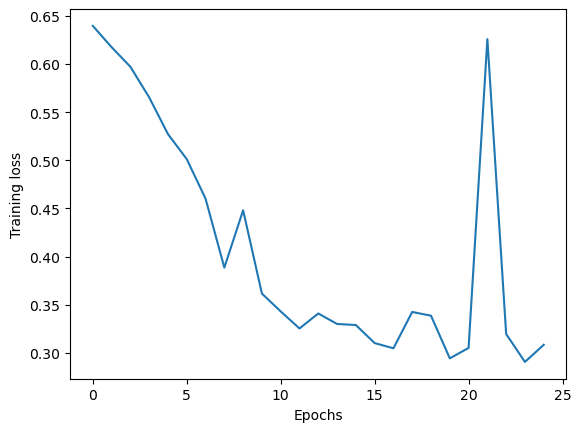

In [34]:
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

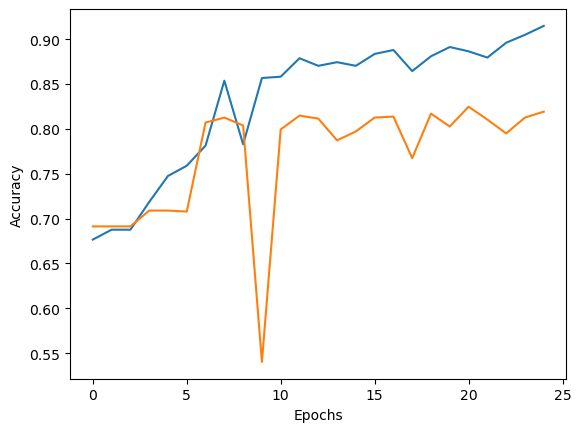

In [35]:
# Accuracy of training and validation sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


38/38 [==============================] - 0s 2ms/step


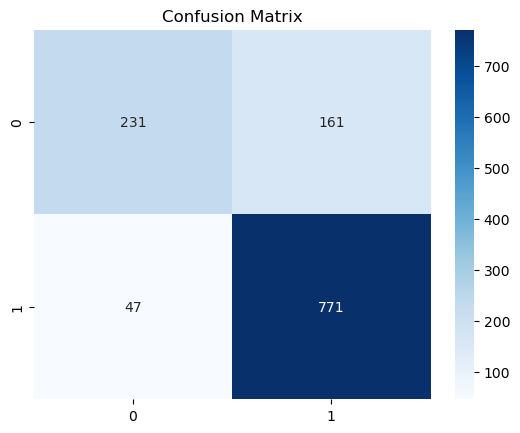

In [36]:
y_pred = RNN_Dense.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),)
y_pred = np.array([round(i) for i in y_pred])

### Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()


In [37]:
len(y_pred)

1210

In [49]:
accuracy = (771+231)/(1210)

In [50]:
accuracy

0.828099173553719

### ANN

In [40]:
ANN = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(input_dim=num_words, output_dim=100, input_length=maxlen),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
    
ANN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          1500100   
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout_3 (Dropout)         (None, 20000)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                1280064   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2780229 (10.61 MB)
Trainable params: 278

In [41]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)
ANN.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='rmsprop'
                 )

Hist=ANN.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))


Epoch 1/25
86/86 [==============================] - 1s 7ms/step - loss: 0.4977 - accuracy: 0.7718 - val_loss: 0.3814 - val_accuracy: 0.8567
Epoch 2/25
86/86 [==============================] - 1s 7ms/step - loss: 0.1806 - accuracy: 0.9416 - val_loss: 0.3831 - val_accuracy: 0.8567
Epoch 3/25
86/86 [==============================] - 1s 6ms/step - loss: 0.0455 - accuracy: 0.9879 - val_loss: 0.5807 - val_accuracy: 0.8302
Epoch 4/25
86/86 [==============================] - 1s 6ms/step - loss: 0.0116 - accuracy: 0.9974 - val_loss: 0.4210 - val_accuracy: 0.8666
Epoch 5/25
86/86 [==============================] - 1s 6ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.5509 - val_accuracy: 0.8567
Epoch 6/25
86/86 [==============================] - 1s 7ms/step - loss: 6.0378e-04 - accuracy: 1.0000 - val_loss: 0.6724 - val_accuracy: 0.8467
Epoch 7/25
86/86 [==============================] - 1s 7ms/step - loss: 1.6907e-04 - accuracy: 1.0000 - val_loss: 1.0733 - val_accuracy: 0.8302
Epoch 8/25
8

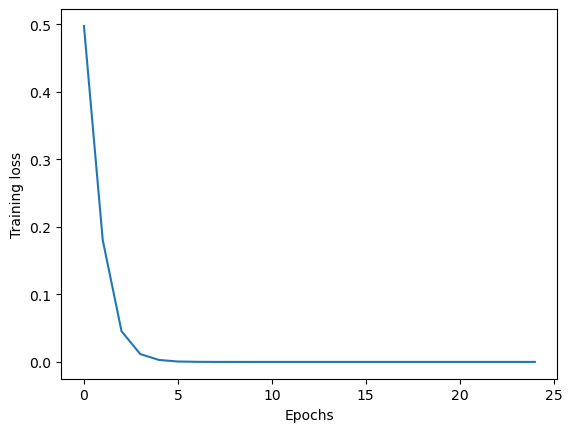

In [42]:
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

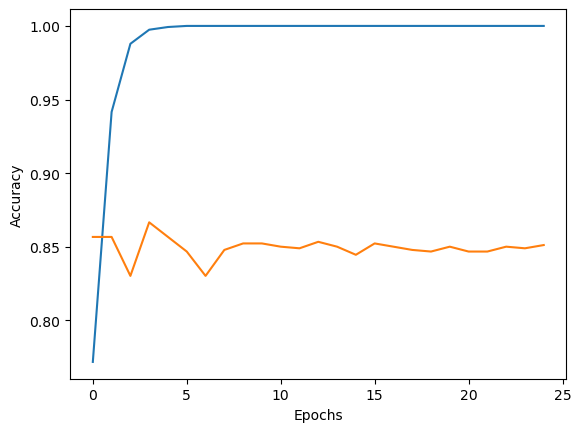

In [43]:
# Accuracy of training and validation sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


38/38 [==============================] - 0s 838us/step


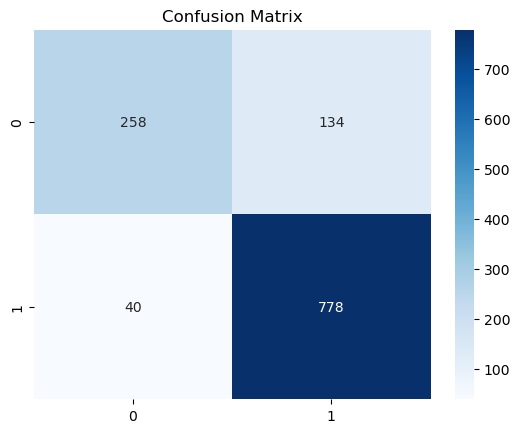

In [44]:
y_pred = ANN.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),)
y_pred = np.array([round(i) for i in y_pred])

### Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()


In [45]:
len(y_pred)

1210

In [47]:
accuracy = (778+258)/(1210)

In [48]:
accuracy

0.856198347107438

#### Word Embeddings

In [76]:
embeddings = np.array(word_embeddings.iloc[:,:-1])

In [77]:
embeddings.shape

(15000, 64)

In [78]:
X_padded[0]

array([  114,     2,   234,     4,  8423,   408,    16,     2,  1966,
       11948,   125,  4294,   490,     3,  1873,    30,     6,   232,
         216,  4355,   311,  2630,    25,   169,  2234,  8592,  2072,
           1,     4,     2,  3264, 10979,     4,     2,  1806,  1143,
         184,     6,    24,  3174,    75,   169,    15,   414,    23,
          24,  7540,     1,   146,  4514,     4,  2998,   311,   527,
           2,  1787,   827,  1747,   458,   226,     2,     1,    44,
        5122,   114,     2,  1659,     8,     1,   118,    11, 11884,
         398,    73,    30,     2,   176,   987,  2028,  1968,     2,
        8254,  1266,    19,   224,     3,   169,  7212,  1666,  1106,
          11,    24,  5217,  4086,  8019,  1645,    14,     2,   205,
         169, 11832,  1645,     3,  6608,  1645, 11152,    47,  5498,
        1932,   169,    89,    91,     2,  5108,   745,  6009,    55,
           3, 10664,    10,   162,  5410,     3,     2,  2615,  1378,
           8,     5,

In [79]:
embeddings

array([[-4.3112006e-02, -4.4179536e-02, -7.0214270e-04, ...,
         8.5551960e-03,  3.1492505e-02, -2.9019510e-02],
       [ 7.7637374e-02, -1.3925786e-01, -1.2017630e-01, ...,
         1.8577665e-01,  1.4772147e-01, -1.0395280e-01],
       [ 2.1940565e-01,  1.4035999e-02, -4.8117870e-03, ...,
        -1.0244907e-01,  1.1713349e-01,  1.9575730e-01],
       ...,
       [-1.1126915e+00,  2.7570200e-01, -1.9465690e-01, ...,
         6.6796580e-01,  1.0420426e+00, -3.6909923e-01],
       [-9.3488410e-02,  3.4691954e-01, -1.2095195e+00, ...,
        -1.1609959e-01, -6.4764476e-01, -1.0812663e+00],
       [ 3.4972262e-01, -3.1710923e-01,  3.5412454e-03, ...,
         7.1736777e-01,  1.3064992e-01, -3.8028170e-02]])

In [80]:
embeddings.max()

3.1213214

In [81]:
def embedded_sequence(sequence):
    embedded_sequence = []
    for index in sequence:
        embedded_sequence.append(embeddings[index])
    return np.array(embedded_sequence)

In [82]:
X_embedded = np.array([embedded_sequence(sequence) for sequence in X_padded])

In [83]:
X_embedded.shape

(4838, 200, 64)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(3628, 200, 64)
(1210, 200, 64)
3628
1210


In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### ANN with embeddings

In [132]:
ANN_EMB = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # Flatten Layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'), # Dense layer 1
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'), # Dense layer 1
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [133]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)
ANN_EMB.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='rmsprop'
                 )

Hist=ANN_EMB.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))


Epoch 1/25
86/86 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7688 - val_loss: 0.4238 - val_accuracy: 0.8214
Epoch 2/25
86/86 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8739 - val_loss: 0.4568 - val_accuracy: 0.8192
Epoch 3/25
86/86 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9386 - val_loss: 0.5964 - val_accuracy: 0.8004
Epoch 4/25
86/86 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9684 - val_loss: 0.6333 - val_accuracy: 0.8126
Epoch 5/25
86/86 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9765 - val_loss: 0.6727 - val_accuracy: 0.8049
Epoch 6/25
86/86 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.8877 - val_accuracy: 0.8115
Epoch 7/25
86/86 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.9796 - val_accuracy: 0.8093
Epoch 8/25
86/86 [==

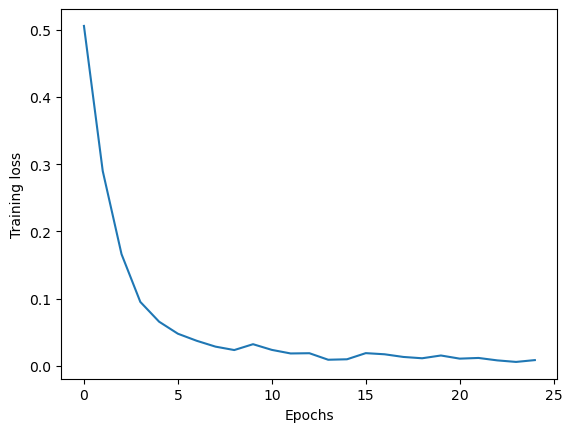

In [134]:
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

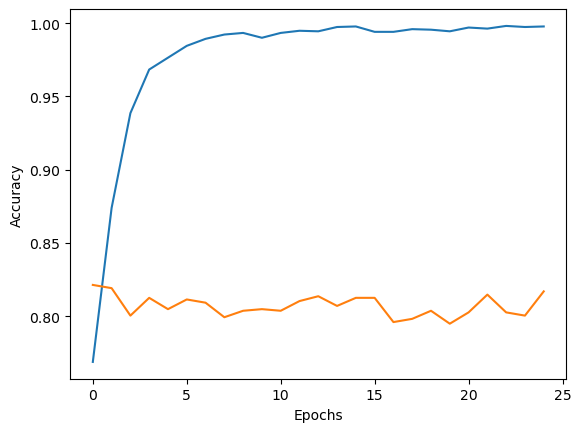

In [135]:
# Accuracy of training and validation sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


38/38 [==============================] - 0s 434us/step


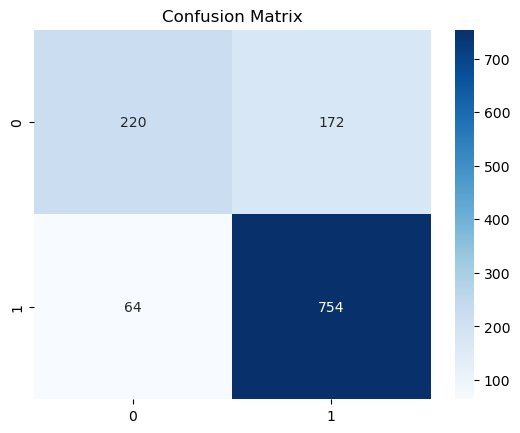

In [136]:
y_pred = ANN_EMB.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),)
y_pred = np.array([round(i) for i in y_pred])

### Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()


In [137]:
len(y_pred)

1210

In [138]:
accuracy = (754+220)/(1210)

In [139]:
accuracy

0.8049586776859504

In [140]:
ANN_EMB.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dropout_36 (Dropout)        (None, 12800)             0         
                                                                 
 dense_50 (Dense)            (None, 16)                204816    
                                                                 
 dropout_37 (Dropout)        (None, 16)                0         
                                                                 
 dense_51 (Dense)            (None, 8)                 136       
                                                                 
 dropout_38 (Dropout)        (None, 8)                 0         
                                                                 
 dense_52 (Dense)            (None, 1)               

### RNN with embeddings

In [113]:
RNN_EMB = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units =32,activation = 'relu',dropout=0.2),
    tf.keras.layers.Dense(16, activation='relu'), # Dense layer 1
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [114]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)
RNN_EMB.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='rmsprop'
                 )

Hist=RNN_EMB.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))


Epoch 1/25
86/86 [==============================] - 1s 11ms/step - loss: 0.6686 - accuracy: 0.6354 - val_loss: 0.6241 - val_accuracy: 0.6913
Epoch 2/25
86/86 [==============================] - 1s 10ms/step - loss: 0.6275 - accuracy: 0.6876 - val_loss: 0.6210 - val_accuracy: 0.6913
Epoch 3/25
86/86 [==============================] - 1s 10ms/step - loss: 0.6205 - accuracy: 0.6876 - val_loss: 0.6166 - val_accuracy: 0.6913
Epoch 4/25
86/86 [==============================] - 1s 10ms/step - loss: 0.6147 - accuracy: 0.6876 - val_loss: 0.6143 - val_accuracy: 0.6913
Epoch 5/25
86/86 [==============================] - 1s 10ms/step - loss: 0.6084 - accuracy: 0.6880 - val_loss: 0.6117 - val_accuracy: 0.6946
Epoch 6/25
86/86 [==============================] - 1s 10ms/step - loss: 0.6114 - accuracy: 0.6920 - val_loss: 0.5612 - val_accuracy: 0.7012
Epoch 7/25
86/86 [==============================] - 1s 10ms/step - loss: 0.5764 - accuracy: 0.7008 - val_loss: 0.5911 - val_accuracy: 0.7012
Epoch 8/25
86

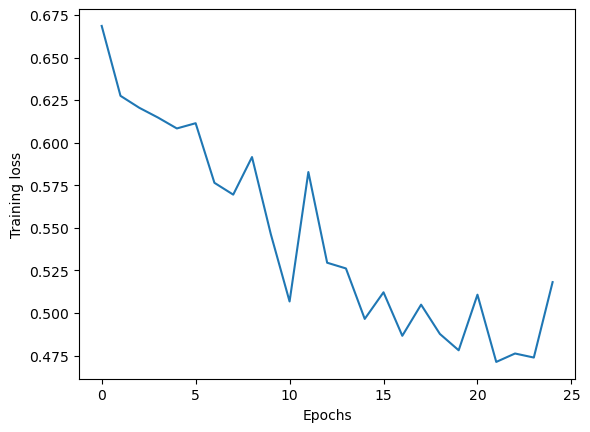

In [115]:
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

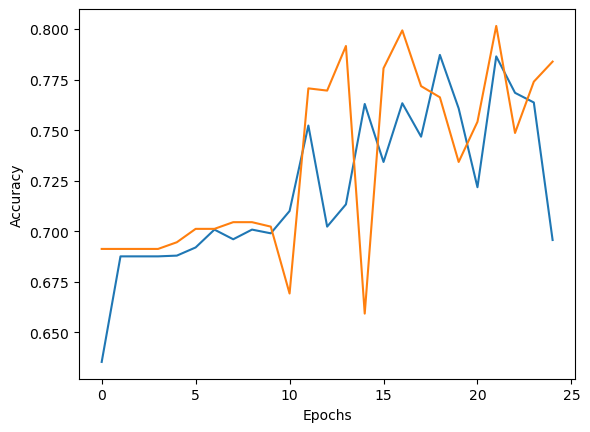

In [116]:
# Accuracy of training and validation sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


38/38 [==============================] - 0s 2ms/step


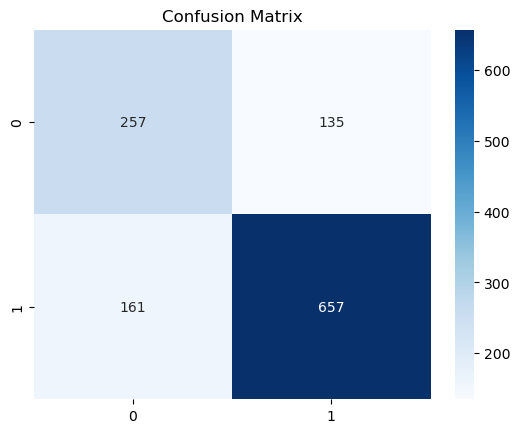

In [117]:
y_pred = RNN_EMB.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),)
y_pred = np.array([round(i) for i in y_pred])

### Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()


In [118]:
len(y_pred)

1210

In [119]:
accuracy = (657+257)/(1210)

In [120]:
accuracy

0.7553719008264462

In [122]:
RNN_EMB.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dropout_32 (Dropout)        (None, 16)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### CNN Embeddings

In [124]:
CNN_EMB = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 5,padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(16,3,padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Flatten(), # Flatten Layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'), # Dense layer 1
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [125]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)
CNN_EMB.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='rmsprop'
                 )

Hist=CNN_EMB.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))


Epoch 1/25
86/86 [==============================] - 1s 5ms/step - loss: 0.5712 - accuracy: 0.7089 - val_loss: 0.6933 - val_accuracy: 0.5369
Epoch 2/25
86/86 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.7964 - val_loss: 0.3974 - val_accuracy: 0.8203
Epoch 3/25
86/86 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8188 - val_loss: 0.3966 - val_accuracy: 0.8258
Epoch 4/25
86/86 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8361 - val_loss: 0.5364 - val_accuracy: 0.7806
Epoch 5/25
86/86 [==============================] - 0s 4ms/step - loss: 0.3490 - accuracy: 0.8537 - val_loss: 0.3892 - val_accuracy: 0.8291
Epoch 6/25
86/86 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8578 - val_loss: 0.4811 - val_accuracy: 0.8082
Epoch 7/25
86/86 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8622 - val_loss: 0.5599 - val_accuracy: 0.7078
Epoch 8/25
86/86 [==

In [126]:
CNN_EMB.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 200, 32)           10272     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 100, 32)           0         
 g1D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 100, 32)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 16)           1552      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 50, 16)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 800)             

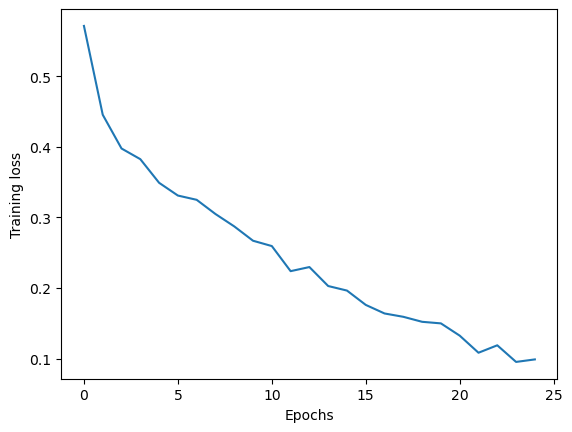

In [127]:
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

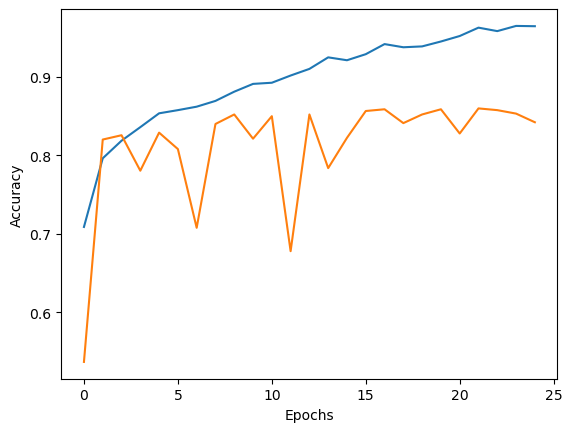

In [128]:
# Accuracy of training and validation sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


38/38 [==============================] - 0s 1ms/step


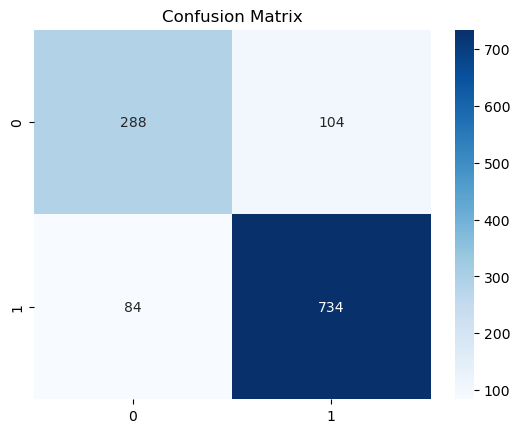

In [129]:
y_pred = CNN_EMB.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),)
y_pred = np.array([round(i) for i in y_pred])

### Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()


In [130]:
accuracy = (734+288)/(1210)

In [131]:
accuracy

0.8446280991735537

### Further Analysis

In [163]:
pred = CNN_EMB.predict(X_embedded)

152/152 [==============================] - 0s 1ms/step


In [165]:
pred = pred.reshape(len(pred),)
pred = np.array([round(i) for i in pred])

In [166]:
pred

array([0, 0, 0, ..., 0, 1, 0])

In [167]:
df.head()

,author,content,poem name,age,type,pred
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,0.001388
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,0.017350
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,0.085711
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,0.000362
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,0.005216


In [194]:
df['author'] = df['author'].str.upper()
df.head()

,author,content,poem name,age,type,pred
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,0
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,0
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,0
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,0
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,0


In [195]:
df['pred'] = pred

In [196]:
df.head()

,author,content,poem name,age,type,pred
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,0
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,0
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,0
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,0
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,0


In [197]:
author_score = df.groupby('author').agg({'pred':['mean','count']}).reset_index()
author_score.columns = ['author','ModernPrediction','NoPoems']
author_score

,author,ModernPrediction,NoPoems
0,A. E. HOUSMAN,0.974359,39
1,"ALFRED, LORD TENNYSON",0.816092,87
2,ALGERNON CHARLES SWINBURNE,0.189189,37
3,ALICE NOTLEY,1.000000,38
4,AMEEN RIHANI,0.812500,80
...,...,...,...
114,WILLIAM CARLOS WILLIAMS,1.000000,45
115,WILLIAM SHAKESPEARE,0.046647,343
116,WILLIAM TOPAZ MCGONAGALL,0.887324,71
117,WILLIAM WORDSWORTH,0.150685,73


In [198]:
author_score['RenaissancePrediction'] = author_score['ModernPrediction'].apply(lambda x: 1-x)
author_score

,author,ModernPrediction,NoPoems,RenaissancePrediction
0,A. E. HOUSMAN,0.974359,39,0.025641
1,"ALFRED, LORD TENNYSON",0.816092,87,0.183908
2,ALGERNON CHARLES SWINBURNE,0.189189,37,0.810811
3,ALICE NOTLEY,1.000000,38,0.000000
4,AMEEN RIHANI,0.812500,80,0.187500
...,...,...,...,...
114,WILLIAM CARLOS WILLIAMS,1.000000,45,0.000000
115,WILLIAM SHAKESPEARE,0.046647,343,0.953353
116,WILLIAM TOPAZ MCGONAGALL,0.887324,71,0.112676
117,WILLIAM WORDSWORTH,0.150685,73,0.849315


In [199]:
actual_age = df[['author','age']].drop_duplicates()
actual_age.shape

(119, 2)

In [200]:
author_score = pd.merge(author_score,actual_age,how = 'left', on = 'author')
author_score

,author,ModernPrediction,NoPoems,RenaissancePrediction,age
0,A. E. HOUSMAN,0.974359,39,0.025641,Modern
1,"ALFRED, LORD TENNYSON",0.816092,87,0.183908,Modern
2,ALGERNON CHARLES SWINBURNE,0.189189,37,0.810811,Renaissance
3,ALICE NOTLEY,1.000000,38,0.000000,Modern
4,AMEEN RIHANI,0.812500,80,0.187500,Modern
...,...,...,...,...,...
114,WILLIAM CARLOS WILLIAMS,1.000000,45,0.000000,Modern
115,WILLIAM SHAKESPEARE,0.046647,343,0.953353,Renaissance
116,WILLIAM TOPAZ MCGONAGALL,0.887324,71,0.112676,Modern
117,WILLIAM WORDSWORTH,0.150685,73,0.849315,Renaissance


In [201]:
author_score['Renaissance'] = author_score['age'] == 'Renaissance'
author_score['error'] = (author_score['Renaissance'] - author_score['RenaissancePrediction']).abs()

In [202]:
author_score

,author,ModernPrediction,NoPoems,RenaissancePrediction,age,Renaissance,error
0,A. E. HOUSMAN,0.974359,39,0.025641,Modern,False,0.025641
1,"ALFRED, LORD TENNYSON",0.816092,87,0.183908,Modern,False,0.183908
2,ALGERNON CHARLES SWINBURNE,0.189189,37,0.810811,Renaissance,True,0.189189
3,ALICE NOTLEY,1.000000,38,0.000000,Modern,False,0.000000
4,AMEEN RIHANI,0.812500,80,0.187500,Modern,False,0.187500
...,...,...,...,...,...,...,...
114,WILLIAM CARLOS WILLIAMS,1.000000,45,0.000000,Modern,False,0.000000
115,WILLIAM SHAKESPEARE,0.046647,343,0.953353,Renaissance,True,0.046647
116,WILLIAM TOPAZ MCGONAGALL,0.887324,71,0.112676,Modern,False,0.112676
117,WILLIAM WORDSWORTH,0.150685,73,0.849315,Renaissance,True,0.150685


In [203]:
author_score = author_score.sort_values(by = 'NoPoems',ascending = False)

In [204]:
author_score

,author,ModernPrediction,NoPoems,RenaissancePrediction,age,Renaissance,error
115,WILLIAM SHAKESPEARE,0.046647,343,0.953353,Renaissance,True,0.046647
110,WALT WHITMAN,0.975000,160,0.025000,Modern,False,0.025000
77,PAUL LAURENCE DUNBAR,0.912281,114,0.087719,Modern,False,0.087719
66,LANGSTON HUGHES,1.000000,111,0.000000,Modern,False,0.000000
86,ROBERT FROST,0.980769,104,0.019231,Modern,False,0.019231
...,...,...,...,...,...,...,...
76,ORLANDO GIBBONS,0.000000,2,1.000000,Renaissance,True,0.000000
95,SIR EDWARD DYER,0.000000,2,1.000000,Renaissance,True,0.000000
94,"SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX",0.000000,2,1.000000,Renaissance,True,0.000000
88,ROBERT SOUTHWELL SJ,0.000000,2,1.000000,Renaissance,True,0.000000


In [205]:
ren_authors = author_score[author_score['Renaissance']][['author','ModernPrediction','RenaissancePrediction']].head()
ren_authors

,author,ModernPrediction,RenaissancePrediction
115,WILLIAM SHAKESPEARE,0.046647,0.953353
56,JOHN DONNE,0.032258,0.967742
96,SIR PHILIP SIDNEY,0.012195,0.987805
117,WILLIAM WORDSWORTH,0.150685,0.849315
28,EDMUND SPENSER,0.000000,1.000000


In [206]:
mod_authors = author_score[~(author_score['Renaissance'])][['author','ModernPrediction','RenaissancePrediction']].head()
mod_authors

,author,ModernPrediction,RenaissancePrediction
110,WALT WHITMAN,0.975000,0.025000
77,PAUL LAURENCE DUNBAR,0.912281,0.087719
66,LANGSTON HUGHES,1.000000,0.000000
86,ROBERT FROST,0.980769,0.019231
32,EMILY DICKINSON,0.970874,0.029126


In [207]:
ren_authors = pd.melt(ren_authors, id_vars="author", var_name="Age", value_name="PredictionProbability")
ren_authors

,author,Age,PredictionProbability
0,WILLIAM SHAKESPEARE,ModernPrediction,0.046647
1,JOHN DONNE,ModernPrediction,0.032258
2,SIR PHILIP SIDNEY,ModernPrediction,0.012195
3,WILLIAM WORDSWORTH,ModernPrediction,0.150685
4,EDMUND SPENSER,ModernPrediction,0.000000
5,WILLIAM SHAKESPEARE,RenaissancePrediction,0.953353
6,JOHN DONNE,RenaissancePrediction,0.967742
7,SIR PHILIP SIDNEY,RenaissancePrediction,0.987805
8,WILLIAM WORDSWORTH,RenaissancePrediction,0.849315
9,EDMUND SPENSER,RenaissancePrediction,1.000000


In [208]:
'ModernPrediction'[:-10]

'Modern'

In [209]:
ren_authors['Age'] = ren_authors['Age'].apply(lambda x: x[:-10])
ren_authors['PredictionProbability'] = round(ren_authors['PredictionProbability']*100)

In [210]:
ren_authors

,author,Age,PredictionProbability
0,WILLIAM SHAKESPEARE,Modern,5.0
1,JOHN DONNE,Modern,3.0
2,SIR PHILIP SIDNEY,Modern,1.0
3,WILLIAM WORDSWORTH,Modern,15.0
4,EDMUND SPENSER,Modern,0.0
5,WILLIAM SHAKESPEARE,Renaissance,95.0
6,JOHN DONNE,Renaissance,97.0
7,SIR PHILIP SIDNEY,Renaissance,99.0
8,WILLIAM WORDSWORTH,Renaissance,85.0
9,EDMUND SPENSER,Renaissance,100.0


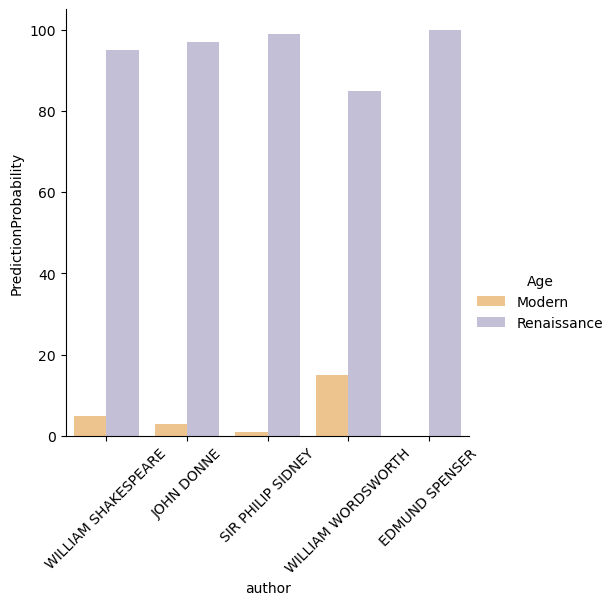

In [216]:
sns.catplot(data = ren_authors, x = 'author',y = 'PredictionProbability',hue = 'Age', kind = 'bar',
           palette = 'PuOr')
plt.xticks(rotation = 45)
plt.show()

In [217]:
mod_authors = pd.melt(mod_authors, id_vars="author", var_name="Age", value_name="PredictionProbability")
mod_authors

,author,Age,PredictionProbability
0,WALT WHITMAN,ModernPrediction,0.975000
1,PAUL LAURENCE DUNBAR,ModernPrediction,0.912281
2,LANGSTON HUGHES,ModernPrediction,1.000000
3,ROBERT FROST,ModernPrediction,0.980769
4,EMILY DICKINSON,ModernPrediction,0.970874
5,WALT WHITMAN,RenaissancePrediction,0.025000
6,PAUL LAURENCE DUNBAR,RenaissancePrediction,0.087719
7,LANGSTON HUGHES,RenaissancePrediction,0.000000
8,ROBERT FROST,RenaissancePrediction,0.019231
9,EMILY DICKINSON,RenaissancePrediction,0.029126


In [218]:
'ModernPrediction'[:-10]

'Modern'

In [219]:
mod_authors['Age'] = mod_authors['Age'].apply(lambda x: x[:-10])
mod_authors['PredictionProbability'] = round(mod_authors['PredictionProbability']*100)

In [220]:
mod_authors

,author,Age,PredictionProbability
0,WALT WHITMAN,Modern,98.0
1,PAUL LAURENCE DUNBAR,Modern,91.0
2,LANGSTON HUGHES,Modern,100.0
3,ROBERT FROST,Modern,98.0
4,EMILY DICKINSON,Modern,97.0
5,WALT WHITMAN,Renaissance,3.0
6,PAUL LAURENCE DUNBAR,Renaissance,9.0
7,LANGSTON HUGHES,Renaissance,0.0
8,ROBERT FROST,Renaissance,2.0
9,EMILY DICKINSON,Renaissance,3.0


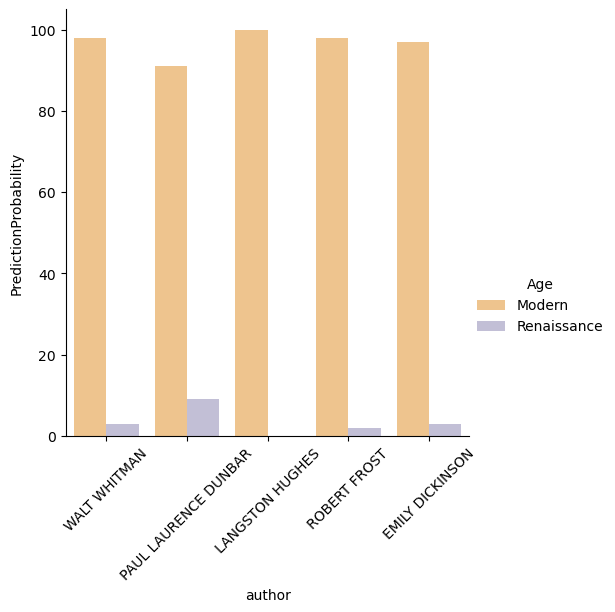

In [221]:
sns.catplot(data = mod_authors, x = 'author',y = 'PredictionProbability',hue = 'Age', kind = 'bar',
           palette = 'PuOr')
plt.xticks(rotation = 45)
plt.show()